## Dataset exploration

In [45]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# importing a particular nurse's dataset
acceleration = pd.read_csv('./DF/ACC.csv').to_numpy()
blood_volume_pulse = pd.read_csv('./DF/BVP.csv')
skin_conductance = pd.read_csv('./DF/EDA.csv')
heart_rate = pd.read_csv('./DF/HR.csv')
inter_beat_interval = pd.read_csv('./DF/IBI.csv')

line plot of each of the dataframe

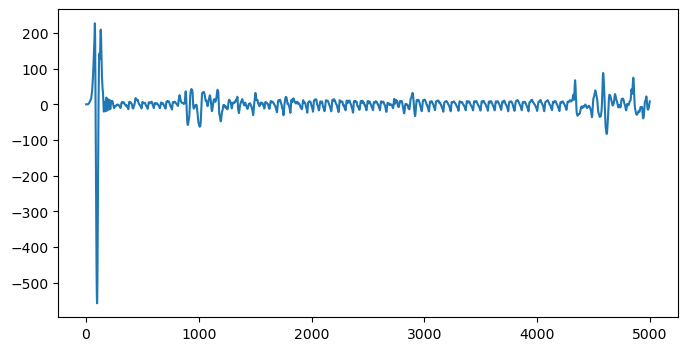

In [47]:
plt.figure(figsize=(8,4))
plt.plot(blood_volume_pulse[2:5000])
plt.show()

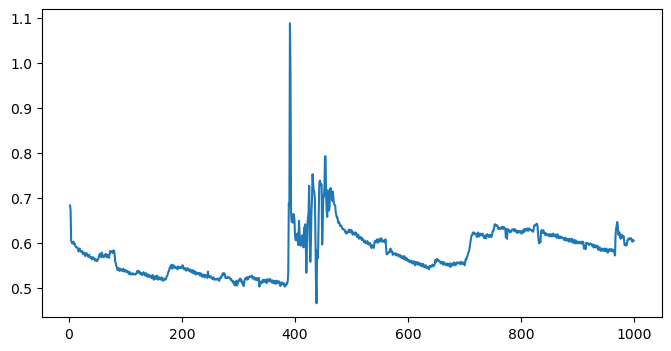

In [48]:
plt.figure(figsize=(8,4))
plt.plot(skin_conductance[2:1000])
plt.show()

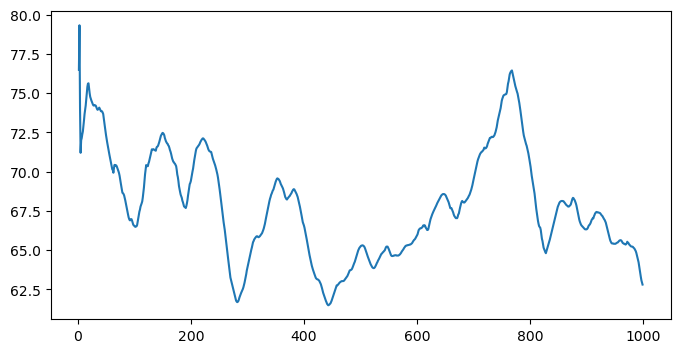

In [49]:
plt.figure(figsize=(8,4))
plt.plot(heart_rate[2:1000])
plt.show()

In [50]:
x, y, z = acceleration[0], acceleration[1], acceleration[2]

In [96]:
# # ploting data using matplotlib pyplot
# %matplotlib widget
# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter3D(x, y, z)
# plt.show()

## Merging all the data

In [13]:
import os
import shutil
import zipfile
import pandas as pd
from scipy import signal

folder_path = "./Stress_dataset/"

dataframes = pd.DataFrame()

# Define the CSV file names to be merged
files_to_count = ["HR.csv", "EDA.csv", "TEMP.csv"]

for subfolder in os.listdir(folder_path):
    # Create the full path to the subfolder
    subfolder_path = os.path.join(folder_path, subfolder)
    # Use a for loop to iterate through each zip file in the subfolder
    for file in os.listdir(subfolder_path):
        # Check if the file is a zip file
        if file.endswith(".zip"):
            # Create the full path to the zip file
            file_path = os.path.join(subfolder_path, file)
            # Extract the contents of the zip file to a temporary folder
            with zipfile.ZipFile(file_path, "r") as zip_ref:
                #os.mkdir(os.path.join(subfolder_path, file.split('.')[0]))
                temp = os.path.join(subfolder_path, file.split('.')[0])
                if os.path.exists(temp):
                    shutil.rmtree(temp)
                os.mkdir(temp)
                zip_ref.extractall(temp)
            subfolder_df = pd.DataFrame()
            for csv_file in files_to_count:
                # Define the path to the current CSV file
                csv_path = os.path.join(temp, csv_file)
                # Read the CSV file into a dataframe
                df = pd.read_csv(csv_path,header=None)
                
                df = pd.DataFrame(signal.resample(df.loc[2:,], len(pd.read_csv(os.path.join(temp, 'HR.csv')))-2))
                df.columns = [csv_file]
                # Merge the dataframe with the current subfolder dataframe
                subfolder_df = pd.concat([subfolder_df, df], axis=1)
    dataframes = pd.concat([dataframes, subfolder_df])

In [13]:
print(dataframes.head(50))
print("\n")
print(dataframes.info())

       HR.csv   EDA.csv   TEMP.csv
0   82.990519  0.299547  33.110608
1   67.488068  0.356934  33.699736
2   61.990386  0.377442  33.530269
3   58.987991  0.445849  33.619117
4   57.194902  0.324909  33.535018
5   56.160331  0.308937  33.622768
6   55.575536  0.239418  33.593516
7   56.893763  0.351857  33.610393
8   58.013111  0.388278  33.602871
9   59.316575  0.098109  33.647412
10  60.373484  0.120759  33.601112
11  61.345540  0.723066  33.648855
12  62.243903  1.191775  33.692054
13  62.941599  1.290392  33.640979
14  63.615301  1.202301  33.610677
15  64.322548  0.834135  33.594456
16  64.831681  1.117909  33.554925
17  65.288814  1.469145  33.599400
18  65.640760  1.473276  33.543398
19  66.005694  1.021052  33.485352
20  66.147176  1.412001  33.373071
21  66.606259  1.406295  33.487308
22  67.052847  1.357065  33.522568
23  67.516019  1.205602  33.556818
24  67.933146  1.200487  33.561856
25  68.367527  1.277985  33.578494
26  68.869247  1.326003  33.582429
27  69.378314  1.364

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Line PLots

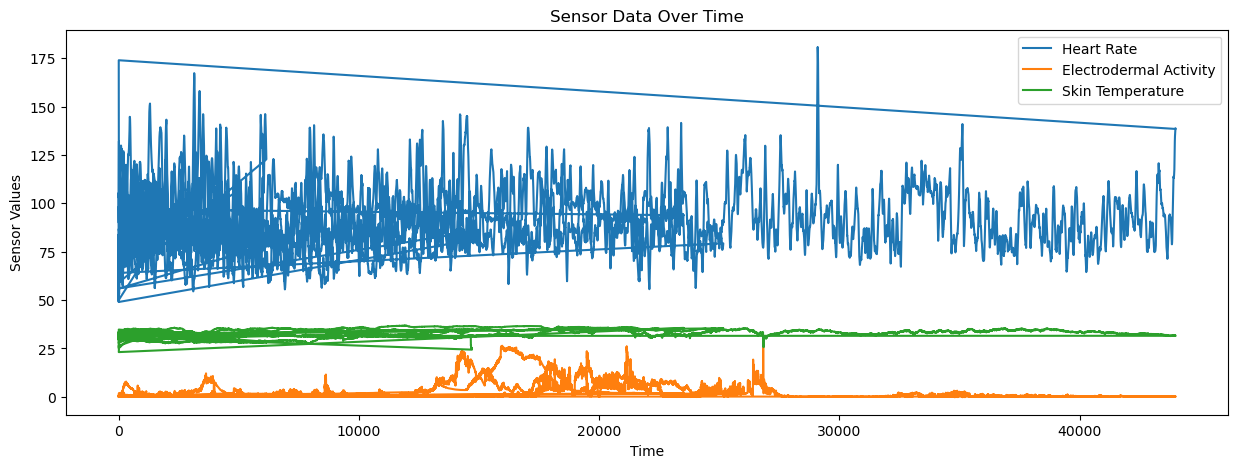

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(dataframes['HR.csv'], label='Heart Rate')
plt.plot(dataframes['EDA.csv'], label='Electrodermal Activity')
plt.plot(dataframes['TEMP.csv'], label='Skin Temperature')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.title('Sensor Data Over Time')
plt.show()

Histograms

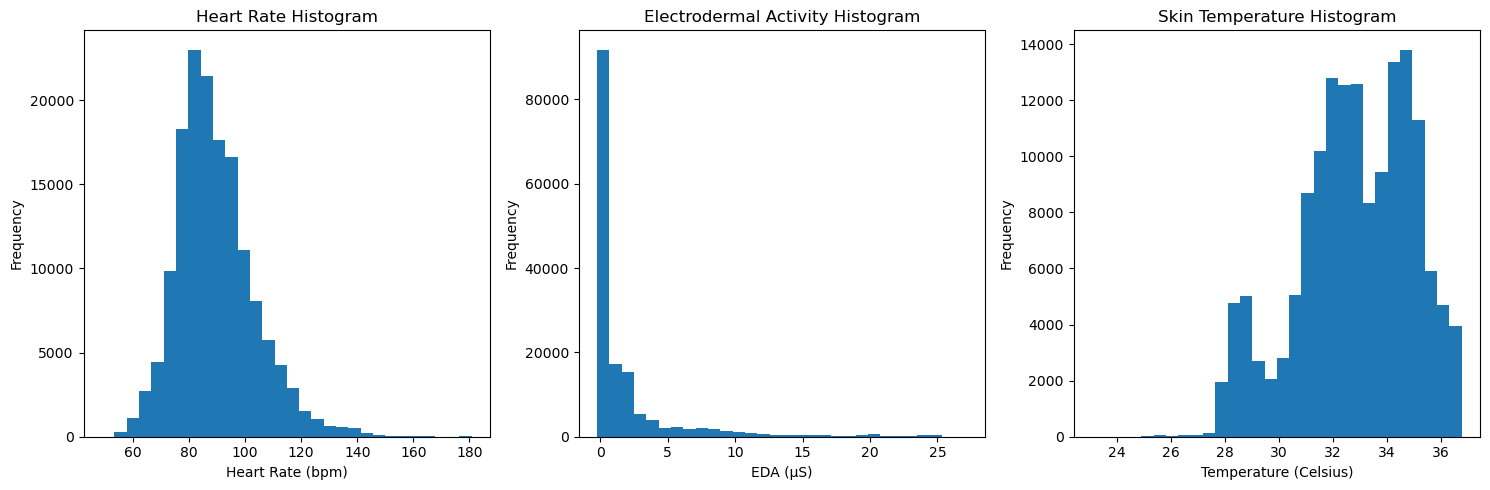

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(dataframes['HR.csv'], bins=30)
axs[0].set_title('Heart Rate Histogram')
axs[0].set_xlabel('Heart Rate (bpm)')
axs[0].set_ylabel('Frequency')

axs[1].hist(dataframes['EDA.csv'], bins=30)
axs[1].set_title('Electrodermal Activity Histogram')
axs[1].set_xlabel('EDA (μS)')
axs[1].set_ylabel('Frequency')

axs[2].hist(dataframes['TEMP.csv'], bins=30)
axs[2].set_title('Skin Temperature Histogram')
axs[2].set_xlabel('Temperature (Celsius)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

A correlation matrix is a table that shows the correlation coefficients between multiple variables. Each cell in the table represents the correlation between two variables. The value ranges between -1 and 1, where:

A value of 1 indicates a perfect positive correlation: when one variable increases, the other variable also increases.
A value of -1 indicates a perfect negative correlation: when one variable increases, the other variable decreases.
A value of 0 indicates no correlation between the two variables.
In the context of your dataset, a correlation matrix helps you understand the relationships between the different sensor measurements (Heart Rate, Electrodermal Activity, and Skin Temperature).

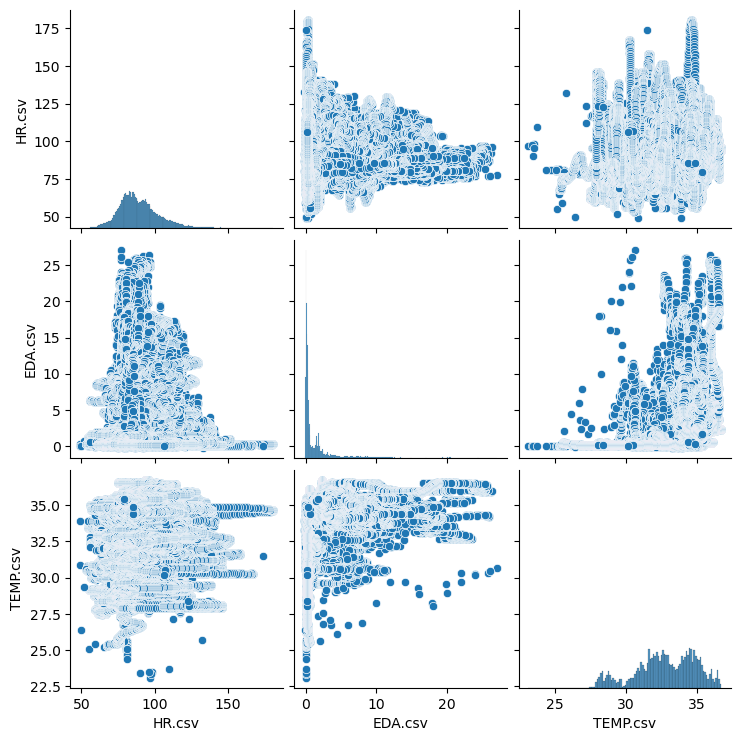

In [17]:
sns.pairplot(dataframes)
plt.show()

In the heatmap visualization, the color represents the strength and direction of the correlation:

A dark blue color represents a strong positive correlation.
A dark red color represents a strong negative correlation.
A neutral color (white) represents no correlation.
The annot=True parameter adds the correlation coefficients to each cell in the heatmap.

By analyzing the correlation matrix, you can gain insights into how the different sensor measurements are related to each other. This can help you determine which features might be more important for your stress prediction model or if there is a need for further feature engineering.

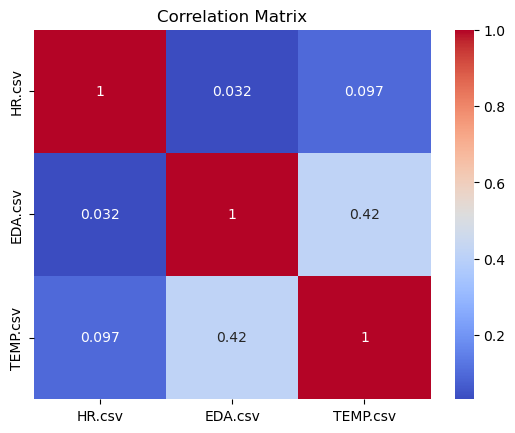

In [18]:
correlation_matrix = dataframes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
df_02 = dataframes.copy()
print(df_02.head())

      HR.csv   EDA.csv   TEMP.csv
0  82.990519  0.299547  33.110608
1  67.488068  0.356934  33.699736
2  61.990386  0.377442  33.530269
3  58.987991  0.445849  33.619117
4  57.194902  0.324909  33.535018


In [44]:
# Calculate basic statistical features
dataframes['HR_mean'] = dataframes['HR.csv'].rolling(window=60).mean()
dataframes['HR_median'] = dataframes['HR.csv'].rolling(window=60).median()
dataframes['HR_std'] = dataframes['HR.csv'].rolling(window=60).std()

dataframes['EDA_mean'] = dataframes['EDA.csv'].rolling(window=60).mean()
dataframes['EDA_median'] = dataframes['EDA.csv'].rolling(window=60).median()
dataframes['EDA_std'] = dataframes['EDA.csv'].rolling(window=60).std()

dataframes['TEMP_mean'] = dataframes['TEMP.csv'].rolling(window=60).mean()
dataframes['TEMP_median'] = dataframes['TEMP.csv'].rolling(window=60).median()
dataframes['TEMP_std'] = dataframes['TEMP.csv'].rolling(window=60).std()

# Calculate moving averages
dataframes['HR_moving_average'] = dataframes['HR.csv'].rolling(window=60).mean()
dataframes['EDA_moving_average'] = dataframes['EDA.csv'].rolling(window=60).mean()
dataframes['TEMP_moving_average'] = dataframes['TEMP.csv'].rolling(window=60).mean()

# Drop the first 59 rows with NaN values due to the rolling window calculations
dataframes = dataframes.dropna().reset_index(drop=True)

print(dataframes.head(3))

      HR.csv   EDA.csv   TEMP.csv    HR_mean  HR_median    HR_std  EDA_mean  \
0  84.502988  1.067963  33.087285  82.860510  83.972784  3.348666  1.411450   
1  84.261403  0.568733  33.094911  83.019373  83.976559  3.178148  1.398857   
2  83.999496  0.787801  33.140030  83.172753  83.989832  2.991154  1.384291   

   EDA_median   EDA_std  TEMP_mean  TEMP_median  TEMP_std  HR_moving_average  \
0    1.383154  0.254387  33.314531    33.334325  0.103833          82.860510   
1    1.383154  0.276514  33.309176    33.330974  0.106745          83.019373   
2    1.377546  0.285310  33.304665    33.329172  0.108093          83.172753   

   EDA_moving_average  TEMP_moving_average  stress_label  
0            1.411450            33.314531             0  
1            1.398857            33.309176             0  
2            1.384291            33.304665             0  


created a binary label for stress by considering both heart rate (HR) and electrodermal activity (EDA). You have defined a high-stress situation as instances where both HR and EDA are above their respective 75th percentile values.

The 'stress_label' column in the dataframe represents a binary classification of stress, where:

'0' indicates no stress or low stress: In this case, both the heart rate and EDA values are below or equal to their respective threshold values, suggesting that the person is not experiencing significant stress at that moment.


'1' indicates stress: In this case, both the heart rate and EDA values are above their respective threshold values, suggesting that the person is experiencing stress at that moment.
These labels are derived from the sensor data (heart rate and EDA) by comparing them to the threshold values calculated based on the 75th percentile of the data. This approach assumes that when both heart rate and EDA are higher than their 75th percentile, it is an indication of stress. It's important to note that this is a simple heuristic and may not capture the complexities of stress accurately. To improve the accuracy of the labels, you could use other methods such as self-reported stress levels, expert annotations, or domain knowledge.

In [22]:
# Define a threshold for high heart rate and high EDA
hr_threshold = dataframes['HR.csv'].quantile(0.75)
eda_threshold = dataframes['EDA.csv'].quantile(0.75)

# Create a binary label for stress
dataframes['stress_label'] = ((dataframes['HR.csv'] > hr_threshold) & (dataframes['EDA.csv'] > eda_threshold)).astype(int)

print(dataframes.head(10), "\n\n unique values of 'stress_label'", dataframes.stress_label.unique())

      HR.csv   EDA.csv   TEMP.csv    HR_mean  HR_median    HR_std  EDA_mean  \
0  74.729607  1.324339  33.416168  68.345386  70.564573  5.642036  1.054473   
1  74.796673  1.661712  33.410712  68.208822  70.564573  5.374361  1.077176   
2  75.375436  1.403118  33.473256  68.340278  70.763515  5.452329  1.094612   
3  75.872522  1.844857  33.491926  68.571647  70.888289  5.472810  1.119069   
4  76.515853  1.692958  33.511516  68.863778  70.928841  5.420130  1.139855   
5  77.117171  1.676481  33.417003  69.195815  70.946590  5.302113  1.162381   
6  77.712730  1.713132  33.337019  69.555022  70.961710  5.131333  1.185784   
7  78.256735  2.039735  33.332228  69.933042  70.970291  4.914910  1.215789   
8  78.583352  2.083852  33.399019  70.294535  70.970590  4.733917  1.244656   
9  78.930863  1.646490  33.465583  70.643164  71.025493  4.581926  1.265626   

   EDA_median   EDA_std  TEMP_mean  TEMP_median  TEMP_std  HR_moving_average  \
0    1.201394  0.412975  33.554205    33.572905  0

separate the features (X) and labels (y) by dropping the 'stress_label' column from the dataset. Then, you use the train_test_split function from the sklearn.model_selection module to split the data into training and testing sets. This function shuffles the data and splits it into two parts: 80% of the data is used for training, and the remaining 20% is used for testing.

In [25]:
# Step 1: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = dataframes.drop('stress_label', axis=1)# # Features
y = dataframes['stress_label'] #Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2201277)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2201277)

In [26]:
sets = [X_train, X_test, y_train, y_test]
for i in range(len(sets)):
    print("length is: {}".format(len(sets[i])))

length is: 121812
length is: 30453
length is: 121812
length is: 30453


In [27]:
# Step 2: Train the Random Forest classifier on the training data
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Step 3: Evaluate the performance of the classifier on the testing data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9999343250254491

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28365
           1       1.00      1.00      1.00      2088

    accuracy                           1.00     30453
   macro avg       1.00      1.00      1.00     30453
weighted avg       1.00      1.00      1.00     30453


Confusion Matrix:
 [[28365     0]
 [    2  2086]]


In [28]:
#conda update -c conda-forge scikit-learn

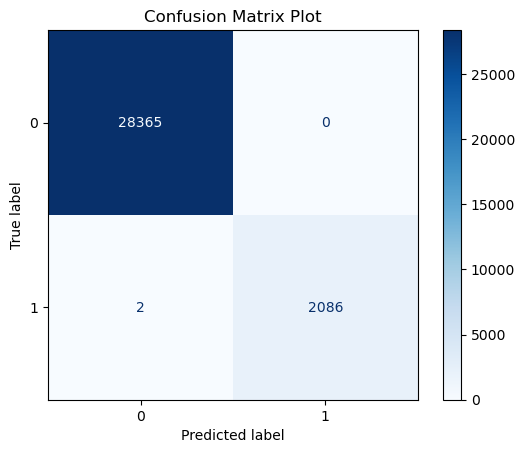

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions using your model
y_pred = rf_clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object and plot
cmd = ConfusionMatrixDisplay(cm, display_labels=rf_clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Plot')
plt.show()

ROC Curve Plot:
A Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) for different thresholds. We can use the roc_curve function from the sklearn.metrics module to compute the TPR and FPR values and then plot them using the matplotlib.pyplot module.

Feature Importance Plot:
Random Forest classifiers can provide a measure of feature importance, which can help us understand which features are most useful in predicting the target variable. We can use the feature_importances_ attribute of the Random Forest classifier to obtain these values and then plot them using the matplotlib.pyplot module.

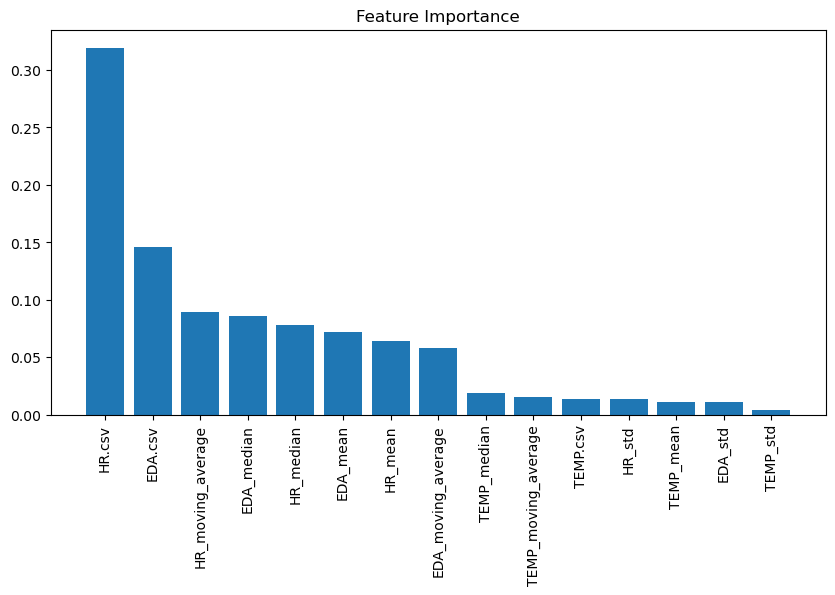

In [31]:
import pandas as pd

feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(feature_importances.index, feature_importances.importance)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()


Perform hyperparameter tuning and cross-validation to further optimize the classifier

Certainly! One alternative method for labeling the data could be to use a z-score-based approach. Z-score is a measure of how far away a data point is from the mean of a distribution, in terms of standard deviations. For instance, you could label a data point as 'stressful' if both its heart rate and EDA z-scores are above a certain threshold.

Here's how you can implement this labeling method:

Calculate the z-scores for heart rate and EDA.
Choose a z-score threshold (e.g., 1, which corresponds to 1 standard deviation above the mean).
Create a new column in the dataframe called 'stress_label'.
Assign a value of 1 to the 'stress_label' column if both the heart rate and EDA z-scores are greater than the chosen threshold. Otherwise, assign a value of 0.
Here's a code snippet to achieve this:


In [34]:
import numpy as np

# Calculate z-scores for heart rate and EDA
df_02['HR_zscore'] = (df_02['HR.csv'] - df_02['HR.csv'].mean()) / df_02['HR.csv'].std()
df_02['EDA_zscore'] = (df_02['EDA.csv'] - df_02['EDA.csv'].mean()) / df_02['EDA.csv'].std()

# Define a z-score threshold
zscore_threshold = 1

# Create a binary label for stress based on z-score threshold
df_02['stress_label'] = ((df_02['HR_zscore'] > zscore_threshold) & (df_02['EDA_zscore'] > zscore_threshold)).astype(int)

print(df_02.head())

      HR.csv   EDA.csv   TEMP.csv  HR_zscore  EDA_zscore  stress_label
0  82.990519  0.299547  33.110608  -0.466588   -0.429771             0
1  67.488068  0.356934  33.699736  -1.579075   -0.414381             0
2  61.990386  0.377442  33.530269  -1.973599   -0.408882             0
3  58.987991  0.445849  33.619117  -2.189057   -0.390537             0
4  57.194902  0.324909  33.535018  -2.317733   -0.422969             0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split the data into training and testing sets
features = ['HR.csv', 'EDA.csv', 'TEMP.csv', 'HR_zscore', 'EDA_zscore']
X = df_02[features]
y = df_02['stress_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Evaluate the classifier's performance on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30071
           1       1.00      1.00      1.00       394

    accuracy                           1.00     30465
   macro avg       1.00      1.00      1.00     30465
weighted avg       1.00      1.00      1.00     30465



Support Vector Machine (SVM) with a radial basis function (RBF) kernel. SVMs are well-suited for binary classification tasks, and the RBF kernel can handle complex relationships in the data.

Here's how to implement the SVM classifier with an RBF kernel for your problem:

Split the data into training and testing sets (same as before).
Standardize the data (important for SVMs).
Train the SVM classifier with RBF kernel on the standardized training data.
Evaluate the classifier's performance on the standardized testing data.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Step 1: Split the data into training and testing sets (same as before)
features = ['HR.csv', 'EDA.csv', 'TEMP.csv', 'HR_zscore', 'EDA_zscore']
X = df_02[features]
y = df_02['stress_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Step 3: Train the SVM classifier with RBF kernel on the standardized training data
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_std, y_train)

# Step 4: Evaluate the classifier's performance on the standardized testing data
y_pred = svm_clf.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9985885442310849
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30071
           1       0.97      0.92      0.94       394

    accuracy                           1.00     30465
   macro avg       0.98      0.96      0.97     30465
weighted avg       1.00      1.00      1.00     30465



The train_test_split function is used to split the data into a training set (80%) and a testing set (20%).
A Random Forest classifier (RandomForestClassifier) with 100 trees is instantiated and trained on the training data (X_train, y_train).
The trained classifier is used to predict the stress labels on the testing data (X_test), and the predictions are compared with the true labels (y_test) to calculate the accuracy.
The accuracy and a classification report are printed to give you an idea of the model's performance.
Please note that, depending on your dataset's size, the Random Forest algorithm might take some time to train. You may need to adjust the n_estimators parameter (number of trees) to balance between training time and model performance

Confusion Matrix: This plot visualizes the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the SVM classifier. A well-performing classifier will have high counts along the main diagonal and low counts in the off-diagonal cells.



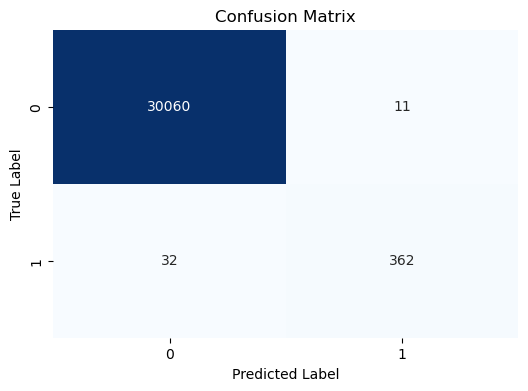

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Step 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC Curve and AUC Score: This plot shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at various decision thresholds. The area under the ROC curve (AUC) is a useful metric to quantify the classifier's overall performance. A perfect classifier will have an AUC of 1, while a random classifier will have an AUC of 0.5.

